In [283]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
import pandas_datareader as reader
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

In [284]:
df = reader.DataReader('AAPL', 'yahoo', '2021-01-01', '2022-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.709213
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.453461
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.041611
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.664223
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.952286
...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749


In [285]:
#df = yf.Ticker('INFY.NS')
#df = df.history(period = 'max', auto_adjust = True)
#df

In [286]:
df = df[['Close']]
df.dropna(inplace = True)
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(df)
def modify(data, pastDays = 14):
  X = []
  Y = []
  for i in range(pastDays, len(data)):
      X.append(data[i - pastDays: i, 0: data.shape[1]])
      Y.append(data[i : i + 1, 0])
  return np.array(X), np.array(Y)
testX, testY = modify(data)

c:\users\mahen\appdata\local\programs\python\python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


RNN

In [287]:
#model1 = load_model('RNN(Uni)')

In [288]:
testPredict1 = model1.predict(testX)
testPredict1 = scaler.inverse_transform(testPredict1)
testY1 = scaler.inverse_transform(testY.reshape(-1, 1))

In [289]:
mape1 = np.mean(np.abs((testY1 - testPredict1)/testY1))*100
mape1

1.704167761857752

Classic LSTM

In [290]:
#model2 = load_model('LSTM(Uni)')

In [291]:
testPredict2 = model2.predict(testX)
testPredict2 = scaler.inverse_transform(testPredict2)
testY2 = scaler.inverse_transform(testY.reshape(-1, 1))

In [292]:
mape2 = np.mean(np.abs((testY2 - testPredict2)/testY2))*100
mape2

1.292563263828581

LSTM Peephole

In [293]:
#model3 = load_model('PeepholeLSTM(Uni)')

In [294]:
testPredict3 = model3.predict(testX)
testPredict3 = scaler.inverse_transform(testPredict3)
testY3 = scaler.inverse_transform(testY.reshape(-1, 1))

In [295]:
mape3 = np.mean(np.abs((testY3 - testPredict3)/testY3))*100
mape3

1.2757901015340092

Bidirectional LSTM

In [296]:
#model4 = load_model('BiLSTM(Uni)')

In [297]:
testPredict4 = model4.predict(testX)
testPredict4 = scaler.inverse_transform(testPredict4)
testY4 = scaler.inverse_transform(testY.reshape(-1, 1))

In [298]:
mape4 = np.mean(np.abs((testY4 - testPredict4)/testY4))*100
mape4

1.2916391773109897

GRU(Gated Recurrent Unit)

In [299]:
#model5 = load_model('GRU(Uni)')

In [300]:
testPredict5 = model5.predict(testX)
testPredict5 = scaler.inverse_transform(testPredict5)
testY5 = scaler.inverse_transform(testY.reshape(-1, 1))

In [301]:
mape5 = np.mean(np.abs((testY5 - testPredict5)/testY5))*100
mape5

1.1938166268831156

Bidirectional GRU

In [302]:
#model6 = load_model('BiGRU(Uni)')

In [303]:
testPredict6 = model6.predict(testX)
testPredict6 = scaler.inverse_transform(testPredict6)
testY6 = scaler.inverse_transform(testY.reshape(-1, 1))

In [304]:
mape6 = np.mean(np.abs((testY6 - testPredict6)/testY6))*100
mape6

1.1835473826404523

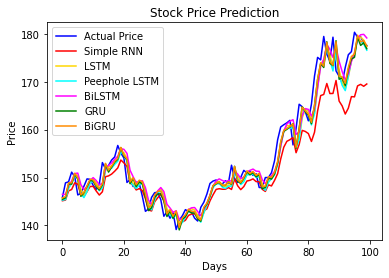

In [305]:
days = [i for i in range(0, 100)]
plt.plot(days, testY1[-100:], color='blue', label='Actual Price')
plt.plot(days, testPredict1[-100:], color='red', label='Simple RNN')
plt.plot(days, testPredict2[-100:], color='gold', label='LSTM')
plt.plot(days, testPredict3[-100:], color='cyan', label='Peephole LSTM')
plt.plot(days, testPredict4[-100:], color='magenta', label='BiLSTM')
plt.plot(days, testPredict5[-100:], color='green', label='GRU')
plt.plot(days, testPredict6[-100:], color='darkorange', label='BiGRU')
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price Prediction")
plt.legend()
plt.show()